# Reading Data from GDrive

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!ls

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

gdp = pd.read_csv('/content/gdrive/My Drive/Columbia Data Science Hackathon/WorldBankGDP.csv')
stringency = pd.read_csv('/content/gdrive/My Drive/Columbia Data Science Hackathon/OxfordCovid.csv')
fuel = pd.read_csv('/content/gdrive/My Drive/Columbia Data Science Hackathon/CovidFuelUsage.csv')

countryNames= stringency.iloc[:,0]

stringency = stringency[stringency.Date > 20200831]
stringency = stringency[stringency.Date < 20200918]
#stringency = stringency.groupby('CountryName').mean()
stringency = stringency.groupby('CountryName', as_index=False).mean()

In [ ]:
countryNames.drop_duplicates()
countryNames.sort_values()
print(countryNames)



0           Aruba
1           Aruba
2           Aruba
3           Aruba
4           Aruba
           ...   
63378    Zimbabwe
63379    Zimbabwe
63380    Zimbabwe
63381    Zimbabwe
63382    Zimbabwe
Name: CountryName, Length: 63383, dtype: object


In [ ]:
stringency.head()
stringency.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185 entries, 0 to 184
Data columns (total 41 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   CountryName                            185 non-null    object 
 1   Date                                   185 non-null    int64  
 2   C1_School closing                      182 non-null    float64
 3   C1_Flag                                141 non-null    float64
 4   C2_Workplace closing                   181 non-null    float64
 5   C2_Flag                                147 non-null    float64
 6   C3_Cancel public events                181 non-null    float64
 7   C3_Flag                                153 non-null    float64
 8   C4_Restrictions on gatherings          182 non-null    float64
 9   C4_Flag                                150 non-null    float64
 10  C5_Close public transport              182 non-null    float64
 11  C5_Fla

# Merging Datasets

                     2019  StringencyIndex
2019             1.000000         0.076879
StringencyIndex  0.076879         1.000000


,Country Name,2019,CountryName,StringencyIndex
0,Aruba,NaN,Aruba,60.3025
1,Afghanistan,1.910135e+10,Afghanistan,21.3000
2,Angola,9.463542e+10,Angola,81.0200
3,Albania,1.527808e+10,Albania,54.6300
4,Andorra,3.154058e+09,Andorra,41.6700
...,...,...,...,...
95,Mali,1.751014e+10,Mali,47.2200
96,Myanmar,7.608585e+10,Myanmar,81.4800
97,Mongolia,1.385285e+10,Mongolia,49.0700
98,Mozambique,1.493416e+10,Mozambique,62.0400


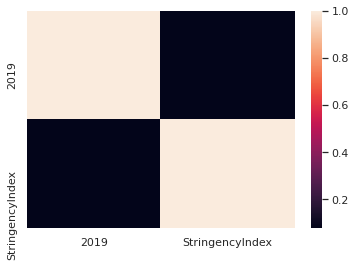

In [ ]:
data = pd.merge(gdp[['Country Name', '2019']], stringency[['CountryName','StringencyIndex']], left_on='Country Name', right_on='CountryName')

data.describe()
print(data.corr())
sns.heatmap(data.corr())

data.head(100)

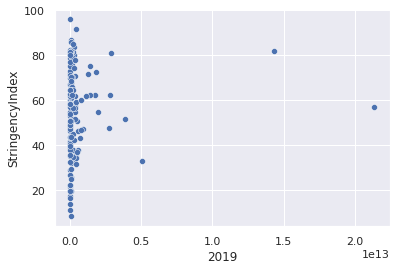

In [ ]:


sns.scatterplot(x=data['2019'], y=data['StringencyIndex'])

In [ ]:
fuel.sort_values(by =['date'])

,date,vehicle_class,percent_of_normal_volume,version
113,2020-03-13,Passenger,102.29,1.0
156,2020-03-14,Passenger,100.10,1.0
100,2020-03-15,Passenger,93.75,1.0
170,2020-03-16,Passenger,92.85,1.0
84,2020-03-17,Passenger,87.16,1.0
...,...,...,...,...
34,2020-09-12,Passenger,79.34,1.0
132,2020-09-13,Passenger,66.54,1.0
87,2020-09-14,Passenger,88.93,1.0
36,2020-09-15,Passenger,90.89,1.0


# Corona Cases and Traffic Congestion City

In [ ]:
congestion = pd.read_csv('/content/gdrive/My Drive/Columbia Data Science Hackathon/congestion.csv')
coronaCases = pd.read_csv('/content/gdrive/My Drive/Columbia Data Science Hackathon/coronaCounty.csv')
combined = pd.merge(congestion, coronaCases, how='left', left_on=['state_name', 'date_time'], right_on=['state_name', 'date'])


coronaCongestion = pd.read_csv('/content/gdrive/My Drive/Columbia Data Science Hackathon/NYC12AM.csv')
coronaCongestion.head()

,state_name,county_name,city_name,date_time,time,percent_congestion,daily_confirmed_cases
0,New York,New York City,New York,3/1/2020,12:00:00 AM,22.324213,1
1,New York,New York City,New York,3/2/2020,12:00:00 AM,18.082261,0
2,New York,New York City,New York,3/3/2020,12:00:00 AM,11.723681,1
3,New York,New York City,New York,3/4/2020,12:00:00 AM,10.128714,0
4,New York,New York City,New York,3/5/2020,12:00:00 AM,13.139277,2


In [ ]:
print(coronaCongestion.corr())

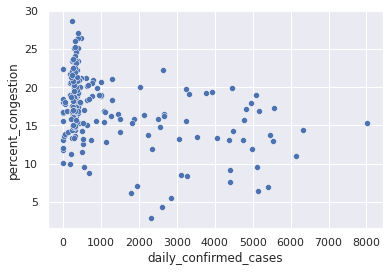

In [ ]:
sns.scatterplot(x=coronaCongestion['daily_confirmed_cases'], y=coronaCongestion['percent_congestion'])

We use K-means clustering to show different 

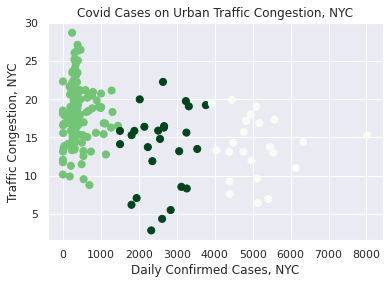

In [ ]:
#Making clusters
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  #for plot styling
import numpy as np
from sklearn.cluster import KMeans

coronaCongestion.dropna()
kmeans = KMeans(n_clusters=3)
cases =coronaCongestion[['daily_confirmed_cases','percent_congestion']]
kmeans.fit(cases)
y_kmeans=kmeans.predict(cases)

plt.scatter(cases['daily_confirmed_cases'], cases['percent_congestion'], c=y_kmeans, s=50, cmap='Greens')
plt.xlabel('Daily Confirmed Cases, NYC')
plt.ylabel('Traffic Congestion, NYC')
plt.title('Covid Cases on Urban Traffic Congestion, NYC')
plt.show()
